In [21]:
import sys
from pathlib import Path
import os
import pandas as pd
from PIL import Image
# Add parent directory to sys.path
parent_dir = Path("..").resolve()
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Now import your module
import importlib
import common_utils
importlib.reload(common_utils)

# Import specific functions
from common_utils import (
    get_unique_image_shapes,
    get_unique_image_paths,
    build_image_dataframe,
    split_data,
    bin_ages,
    bin_ages_7,
    augment_images
)


Check the shapes to see what we are working with and know how to handle the imput into the model later on

In [2]:
# unique_shapes = get_unique_image_shapes()
# for shape in unique_shapes:
#     print(shape)


In [20]:
paths=get_unique_image_paths()
len(paths)

9572

In [22]:
aug_paths=augment_images(paths)
len(paths)

86148

In [23]:
image_paths_csv=build_image_dataframe(paths)
image_paths_csv_aug=build_image_dataframe(aug_paths)

In [5]:
image_paths_csv.head(5)

,path,age
0,../raw_data2/face_age/001/1000.png,1
1,../raw_data2/face_age/001/1018.png,1
2,../raw_data2/face_age/001/1030.png,1
3,../raw_data2/face_age/001/1062.png,1
4,../raw_data2/face_age/001/1068.png,1


<Axes: xlabel='age'>

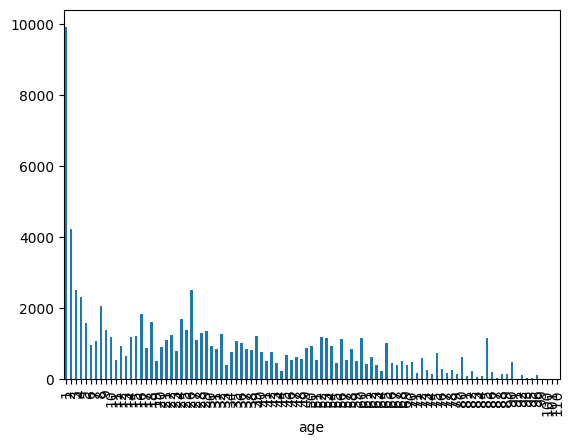

In [24]:
image_paths_csv.age.value_counts().sort_index().plot(kind='bar')

In [25]:
image_paths_csv=bin_ages(image_paths_csv)
image_paths_csv_7_classes=bin_ages_7(image_paths_csv)
image_paths_csv_aug=bin_ages(image_paths_csv_aug)
image_paths_csv_7_classes_aug=bin_ages_7(image_paths_csv_aug)

<Axes: xlabel='age_bin'>

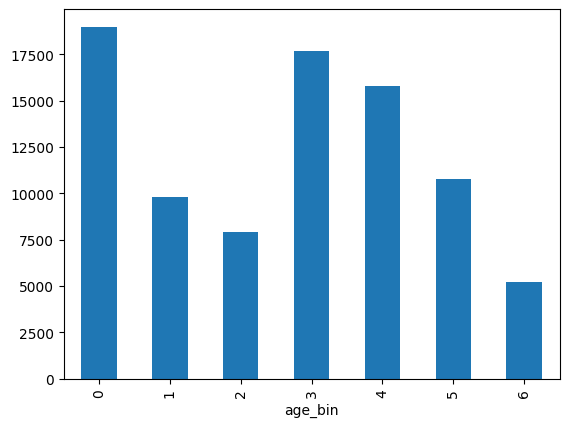

In [26]:
image_paths_csv_7_classes.age_bin.value_counts().sort_index().plot(kind='bar')

In [11]:
image_paths_csv.head()

,path,age,age_bin,age_bin_label
0,../raw_data2/face_age/001/1000.png,1,0,Infant/Toddler (1–4)
1,../raw_data2/face_age/001/1018.png,1,0,Infant/Toddler (1–4)
2,../raw_data2/face_age/001/1030.png,1,0,Infant/Toddler (1–4)
3,../raw_data2/face_age/001/1062.png,1,0,Infant/Toddler (1–4)
4,../raw_data2/face_age/001/1068.png,1,0,Infant/Toddler (1–4)


In [27]:
import os
os.makedirs("./processed_data",exist_ok=True)

image_paths_csv.to_csv("./processed_data/image_paths.csv", index=False)
image_paths_csv_7_classes.to_csv("./processed_data/image_paths_7_classes.csv", index=False)

image_paths_csv_aug.to_csv("./processed_data/image_paths_aug.csv", index=False)
image_paths_csv_7_classes_aug.to_csv("./processed_data/image_paths_7_classes_aug.csv", index=False)

In [14]:
image_paths_csv.age_bin.value_counts().sort_index()

age_bin
0    2109
1    1087
2     879
3    1962
4    1755
5    1199
6     581
Name: count, dtype: int64

In [15]:
paths_train_df, paths_val_df, paths_test_df = split_data(image_paths_csv)